HR Analytics Project
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees. How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [4]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [6]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Data set contain 1470 rows and 35 columns

Exploratory Data Analysis

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

Ensuring that no truncate data in this data set

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We see that 26 columns integer data type and 9 columns object data type.

In [10]:
df.nunique().to_frame("Unique Values")

,Unique Values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


It show all unique values in the columns.

In [11]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no missing values present in the columns

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [13]:
df.drop(["EmployeeCount","EmployeeNumber","Over18","StandardHours"],axis=1,inplace=True)

I am dropping all the unwanted columns.

In [14]:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
object_datatype        

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [15]:
integer_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'int64':
        integer_datatype.append(x)
integer_datatype

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

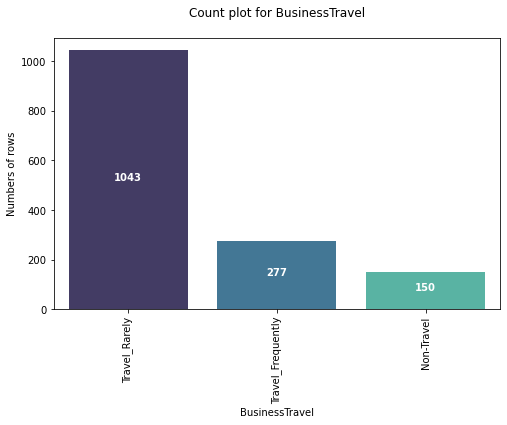

In [16]:
plt.figure(figsize=(8,5))
col_name = 'BusinessTravel'
values = df[col_name].value_counts()
index = 0 
ax = sns.countplot(df[col_name],palette="mako")
    
for i in ax.get_xticklabels():
    ax.text(index,values[i.get_text()]/2,values[i.get_text()],
            horizontalalignment="center",fontweight='bold',color='w')
    index += 1
    
plt.title(f"Count plot for {col_name}\n")
plt.ylabel(f"Numbers of rows")
plt.xticks(rotation=90)
plt.show()

We see that business travels are rarely travel

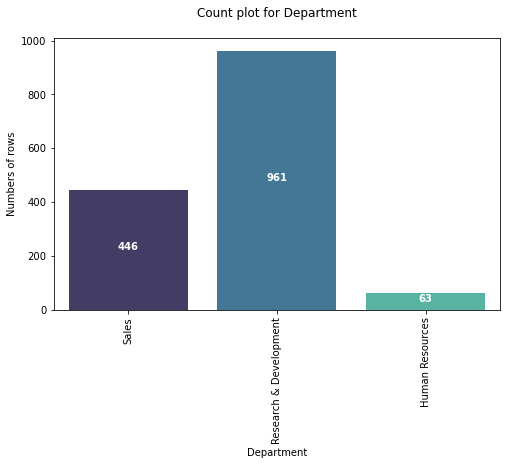

In [17]:
plt.figure(figsize=(8,5))
col_name = 'Department'
values = df[col_name].value_counts()
index = 0 
ax = sns.countplot(df[col_name],palette="mako")
    
for i in ax.get_xticklabels():
    ax.text(index,values[i.get_text()]/2,values[i.get_text()],
            horizontalalignment="center",fontweight='bold',color='w')
    index += 1
    
plt.title(f"Count plot for {col_name}\n")
plt.ylabel(f"Numbers of rows")
plt.xticks(rotation=90)
plt.show()

we see that R&D DEPARMENT IS HIGH AND HR IS LEAST

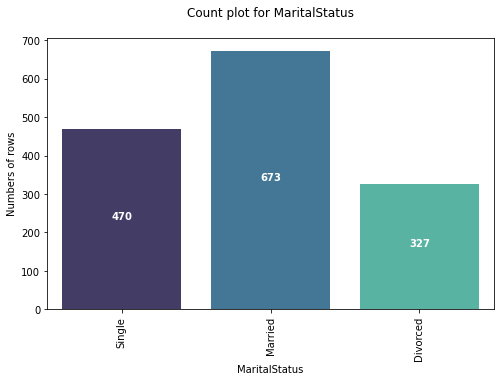

In [18]:
plt.figure(figsize=(8,5))
col_name = 'MaritalStatus'
values = df[col_name].value_counts()
index = 0 
ax = sns.countplot(df[col_name],palette="mako")
    
for i in ax.get_xticklabels():
    ax.text(index,values[i.get_text()]/2,values[i.get_text()],
            horizontalalignment="center",fontweight='bold',color='w')
    index += 1
    
plt.title(f"Count plot for {col_name}\n")
plt.ylabel(f"Numbers of rows")
plt.xticks(rotation=90)
plt.show()

We see that married are highest and divorced are least

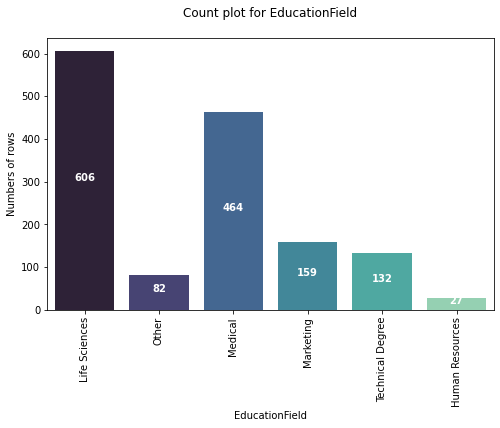

In [19]:
plt.figure(figsize=(8,5))
col_name = 'EducationField'
values = df[col_name].value_counts()
index = 0 
ax = sns.countplot(df[col_name],palette="mako")
    
for i in ax.get_xticklabels():
    ax.text(index,values[i.get_text()]/2,values[i.get_text()],
            horizontalalignment="center",fontweight='bold',color='w')
    index += 1
    
plt.title(f"Count plot for {col_name}\n")
plt.ylabel(f"Numbers of rows")
plt.xticks(rotation=90)
plt.show()

We see life science is highest .

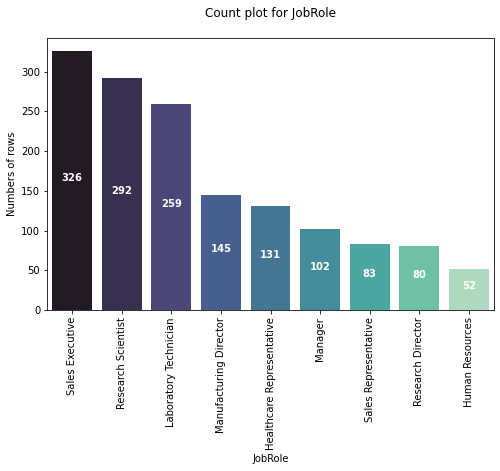

In [20]:
plt.figure(figsize=(8,5))
col_name = 'JobRole'
values = df[col_name].value_counts()
index = 0 
ax = sns.countplot(df[col_name],palette="mako")
    
for i in ax.get_xticklabels():
    ax.text(index,values[i.get_text()]/2,values[i.get_text()],
            horizontalalignment="center",fontweight='bold',color='w')
    index += 1
    
plt.title(f"Count plot for {col_name}\n")
plt.ylabel(f"Numbers of rows")
plt.xticks(rotation=90)
plt.show()

we see that sale executive has highest and hr is least.

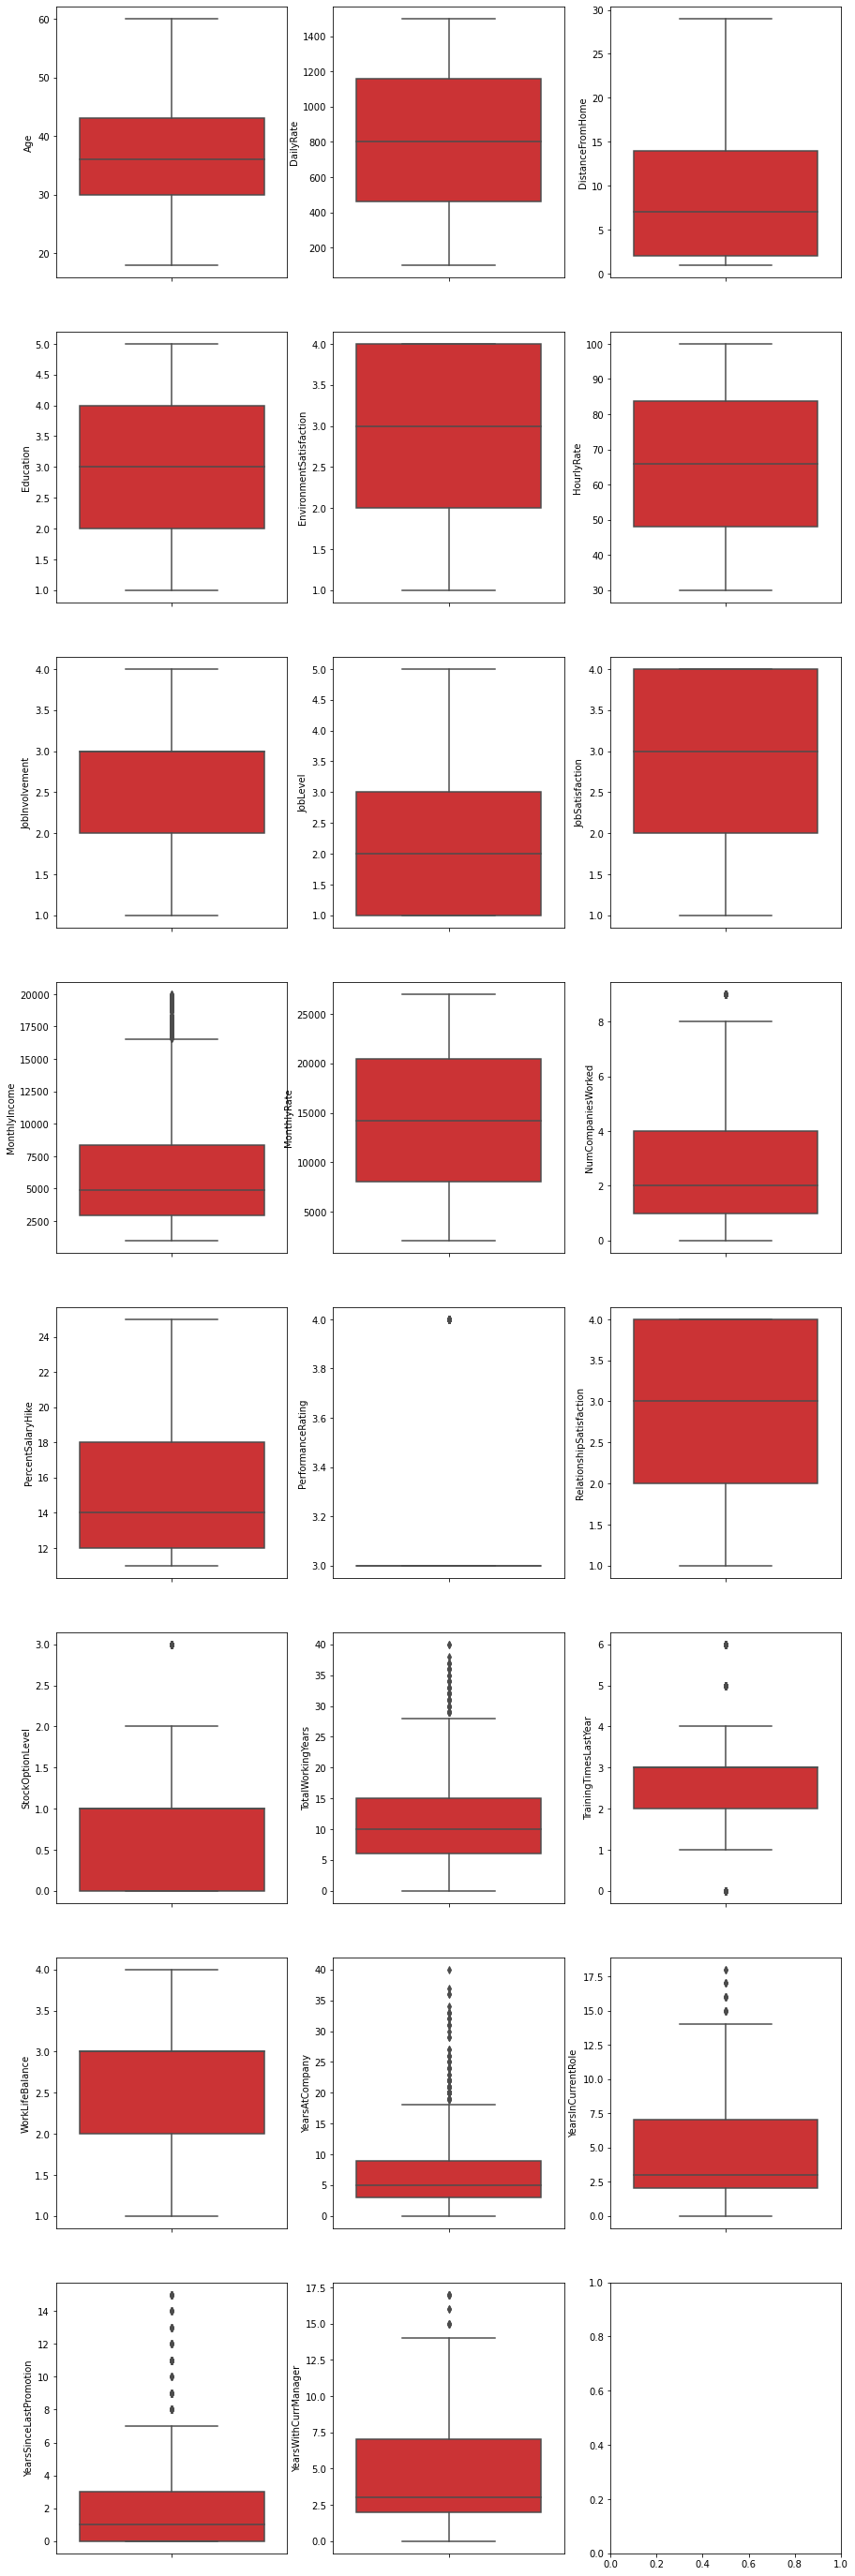

In [22]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set1")
    index += 1
plt.show()    

All above i can see that some outliers are present.

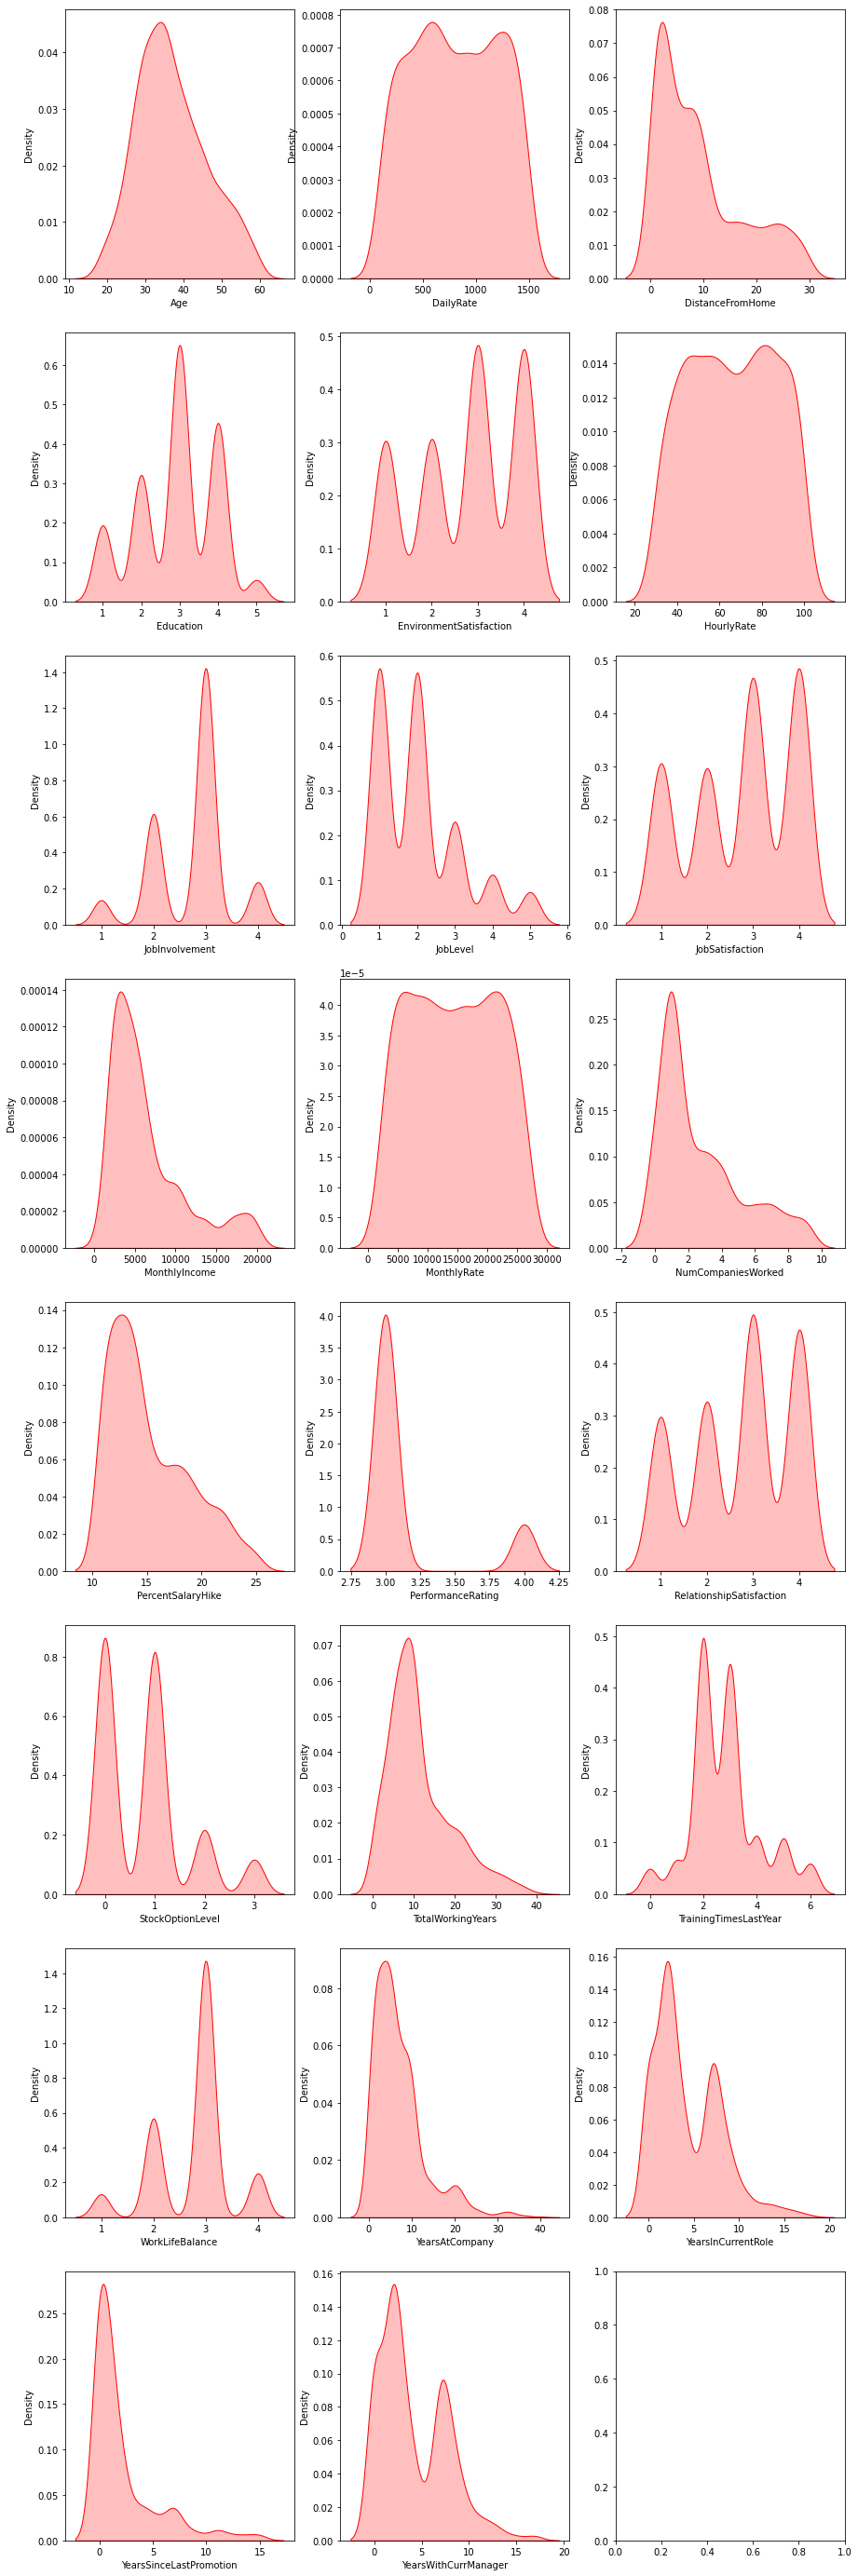

In [23]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade":True})
    index += 1
plt.show()    

We see some skewness in the data type

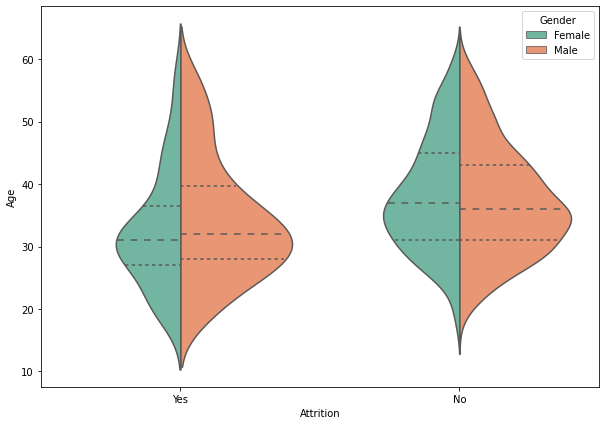

In [24]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition",y="Age",hue="Gender",data=df,
              palette="Set2",split=True,scale="count",inner="quartile")
plt.show()

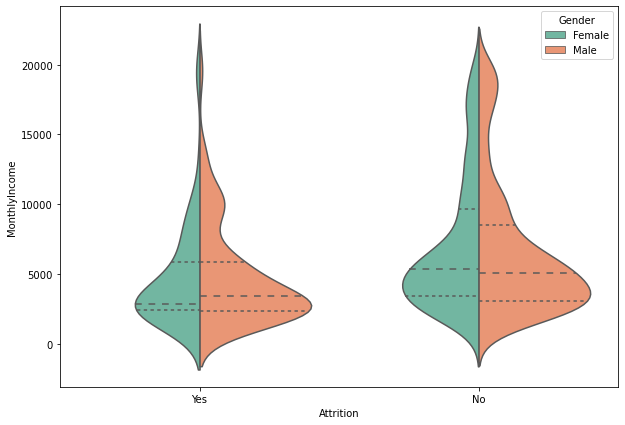

In [25]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition",y="MonthlyIncome",hue="Gender",data=df,
              palette="Set2",split=True,scale="count",inner="quartile")
plt.show()

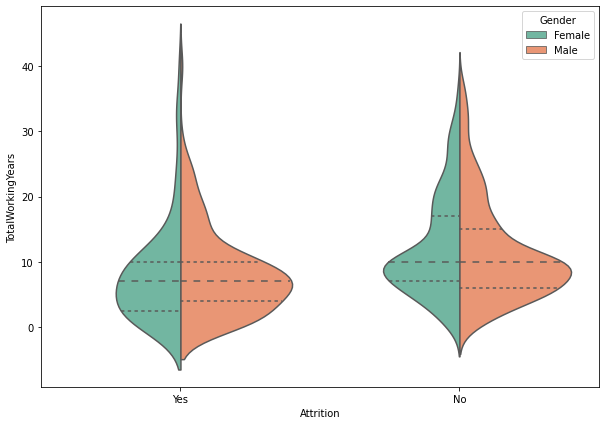

In [26]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition",y="TotalWorkingYears",hue="Gender",data=df,
              palette="Set2",split=True,scale="count",inner="quartile")
plt.show()

Above violin plot shows us that attrition for both male and female employee occur when it comes to experience in range between 1-10

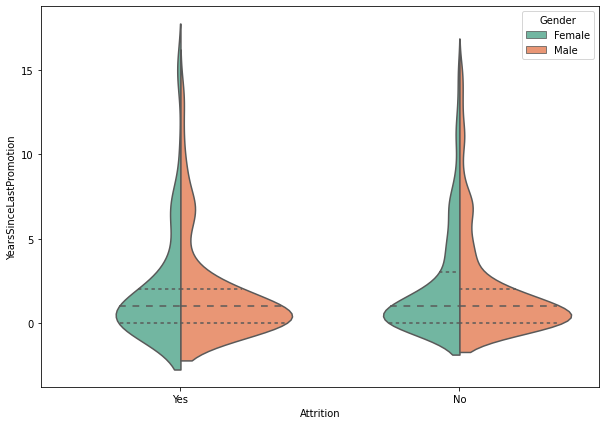

In [27]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition",y="YearsSinceLastPromotion",hue="Gender",data=df,
              palette="Set2",split=True,scale="count",inner="quartile")
plt.show()

Above violin plot shows us that attrition for both male and female employee happen

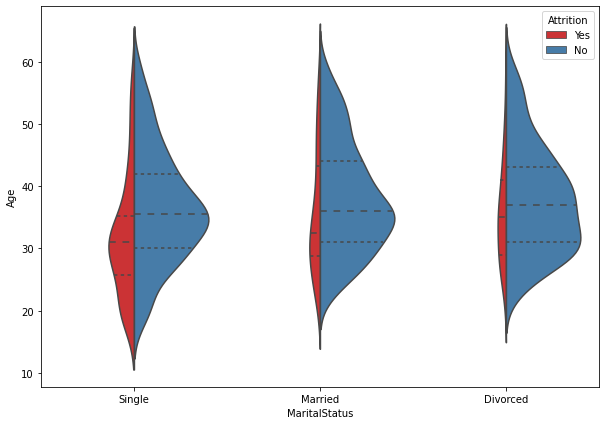

In [29]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus",y="Age",hue="Attrition",data=df,
              palette="Set1",split=True,scale="count",inner="quartile")
plt.show()

Above violin plot shows us that attrition rate is quite less as compared to married and divorced

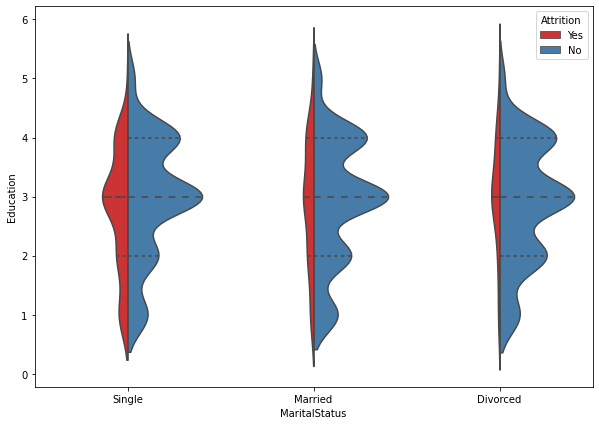

In [30]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus",y="Education",hue="Attrition",data=df,
              palette="Set1",split=True,scale="count",inner="quartile")
plt.show()

Above violin plot shows us that ggod education and married gives stability

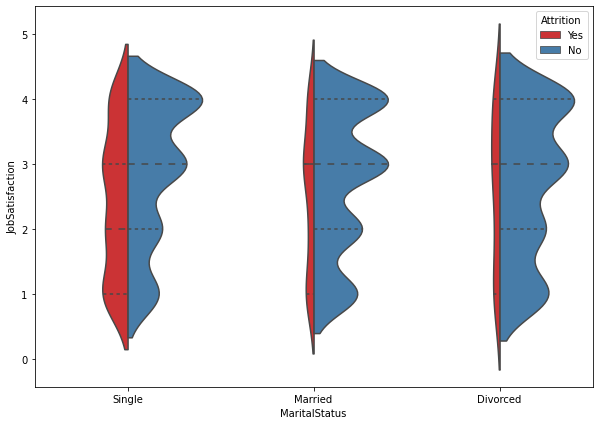

In [31]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus",y="JobSatisfaction",hue="Attrition",data=df,
              palette="Set1",split=True,scale="count",inner="quartile")
plt.show()

Above violin plot shows us that the job statisfication pat for single is not that great as compared to married or divorced

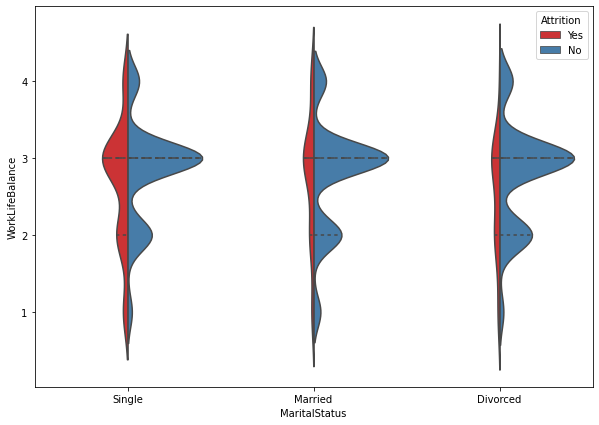

In [32]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus",y="WorkLifeBalance",hue="Attrition",data=df,
              palette="Set1",split=True,scale="count",inner="quartile")
plt.show()

Above violin plot shows us that work life balance maintained by single are quite less

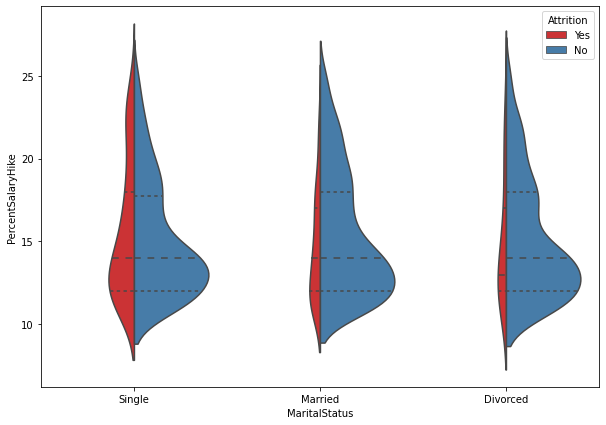

In [33]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus",y="PercentSalaryHike",hue="Attrition",data=df,
              palette="Set1",split=True,scale="count",inner="quartile")
plt.show()

Above violin plot shows us that PercentSalaryHike plays a major role

Encoding the categorical object datatype columns

In [35]:
le = LabelEncoder()
le.fit(df["Attrition"])
le.classes_
pd.Series(le.transform(df["Attrition"])).head()

0    1
1    0
2    1
3    0
4    0
dtype: int64

In [36]:
df["Attrition"] = le.fit_transform(df["Attrition"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [37]:
oe = OrdinalEncoder()
df['BusinessTravel'] = oe.fit_transform(df['BusinessTravel'].values.reshape(-1,1))
df['Department'] = oe.fit_transform(df['Department'].values.reshape(-1,1))
df['EducationField'] = oe.fit_transform(df['EducationField'].values.reshape(-1,1))
df['Gender'] = oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['JobRole'] = oe.fit_transform(df['JobRole'].values.reshape(-1,1))
df['MaritalStatus'] = oe.fit_transform(df['MaritalStatus'].values.reshape(-1,1))
df['OverTime'] = oe.fit_transform(df['OverTime'].values.reshape(-1,1))
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2


We clearly see that we sucessfully convert the object data type to numeric data type

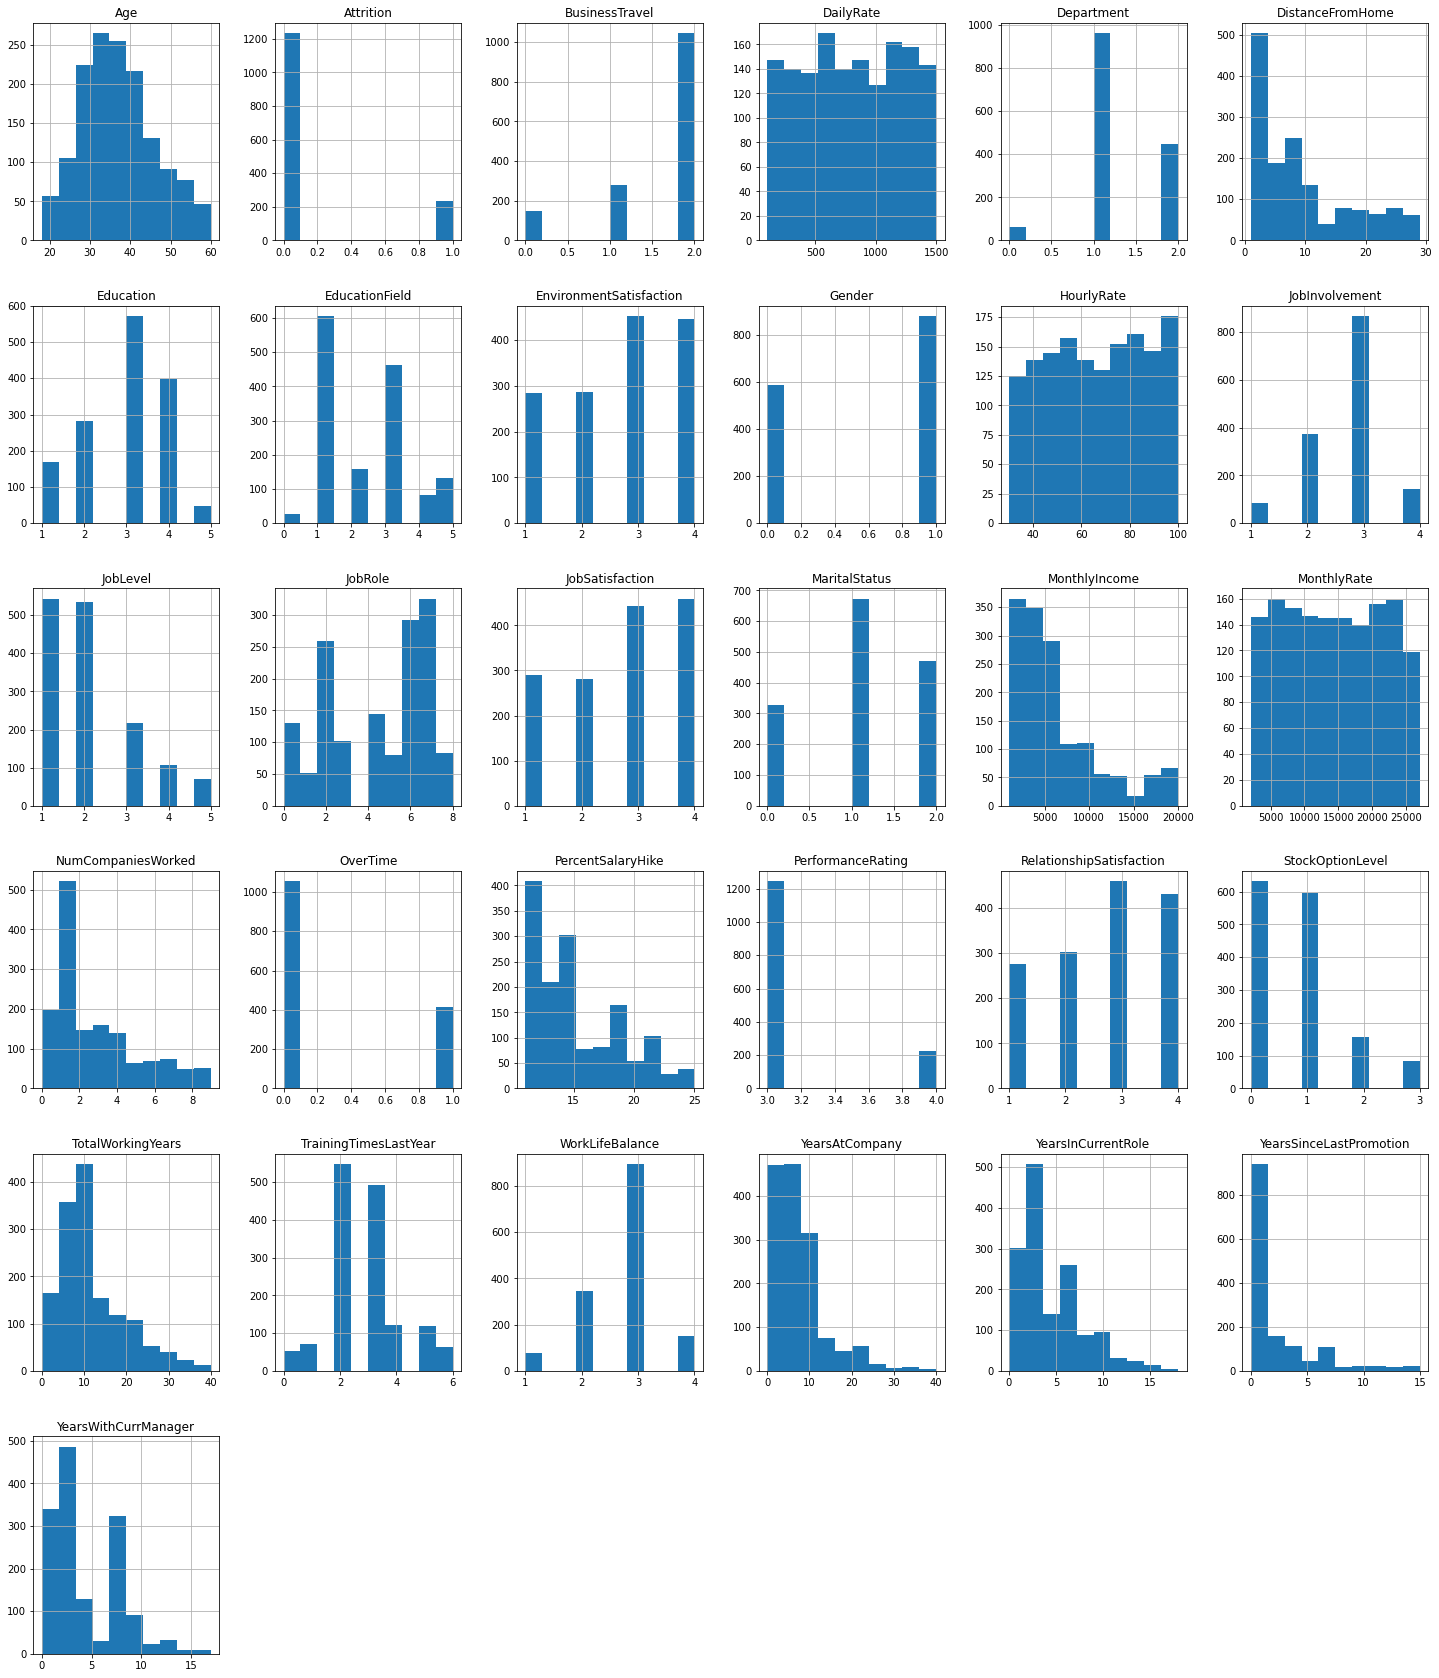

In [38]:
df.hist(figsize=(25,30))
plt.show()

There is no object data type column is here

Corelation using heatmap

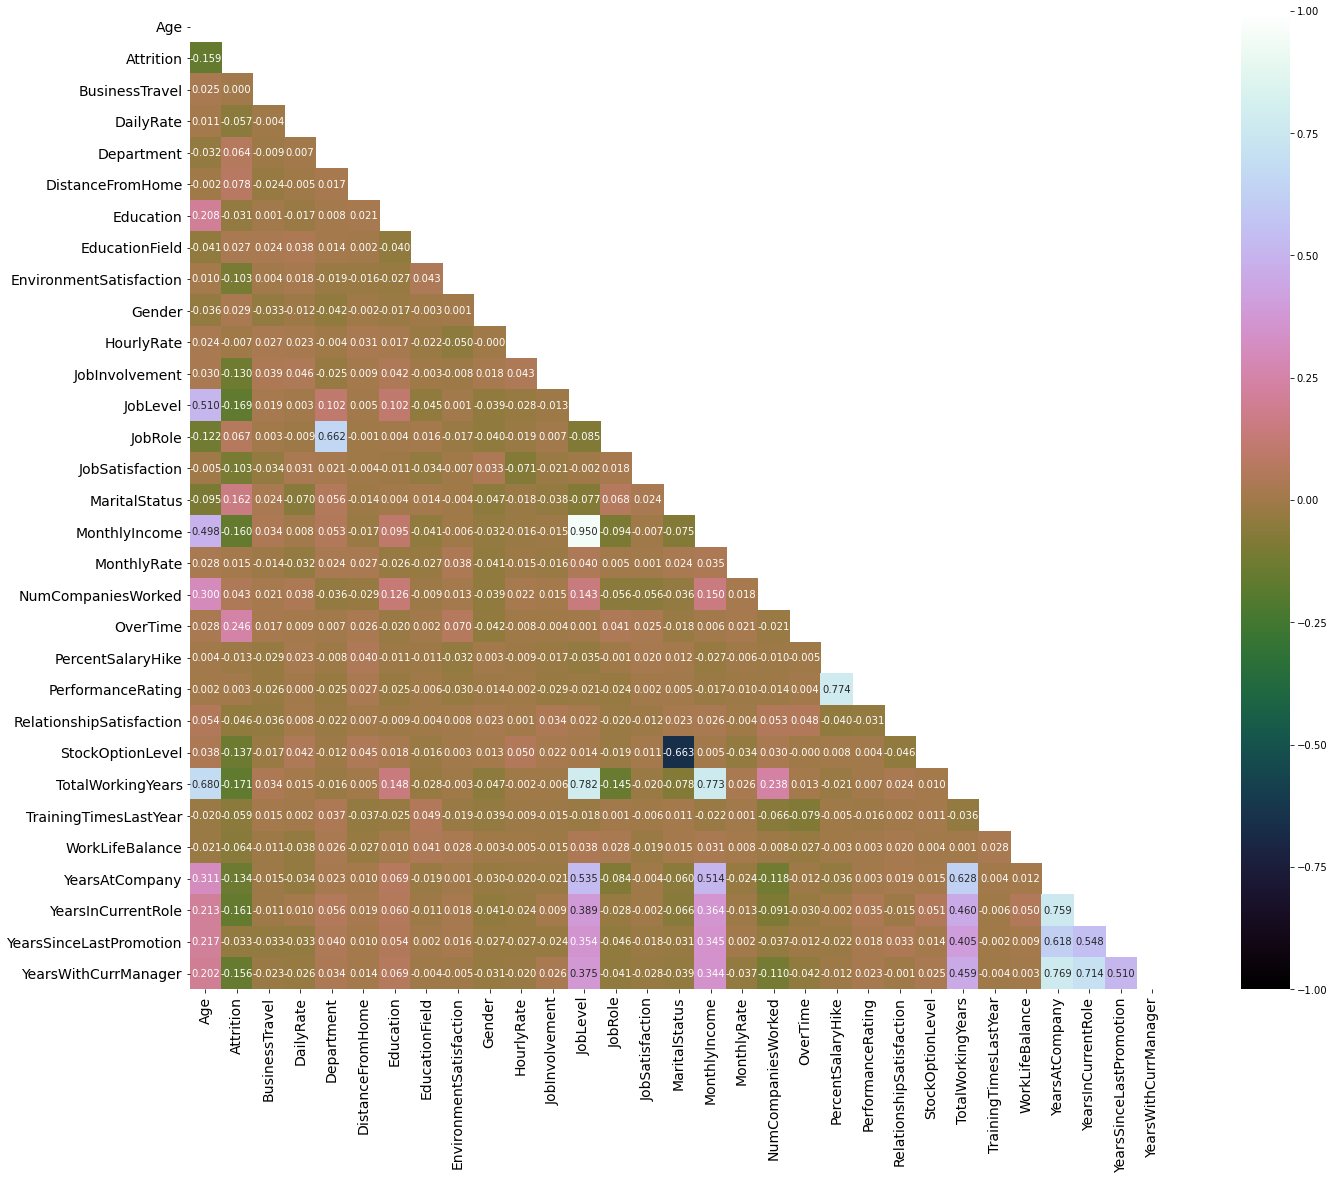

In [39]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(26,18))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In the above heat map we can see that correlation details plus we can determine that there is no multi colinearity issue between our columns.

Corelation bar plot comparing features with our labels

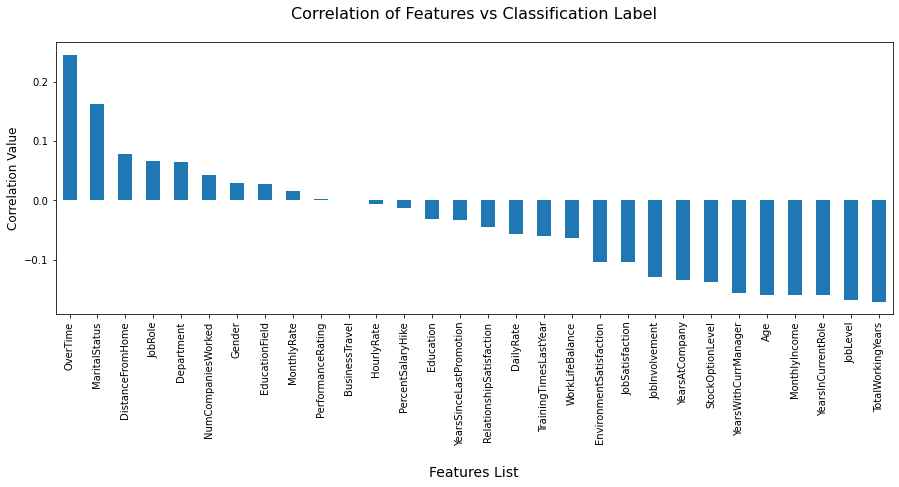

In [40]:
df_corr = df.corr()
plt.figure(figsize=(15,5))
df_corr['Attrition'].sort_values(ascending=False).drop('Attrition').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Since heatmap was not able to give us a clea picture on positive and negative correlation columns we have generated this bar plot and we can see that columns relationship and marital status are the only ones negatively correlated rest all the other feature columns are positively correlated with our label column.

Using Z SCORE technique to remove outliers

In [41]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print("Shape of the dataframe before removing outliers",df.shape)
print("Shape of the dataframe after removing outliers",df1.shape)
print("Percentage of data loss post outliers removal", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers (1470, 31)
Shape of the dataframe after removing outliers (1387, 31)
Percentage of data loss post outliers removal 5.646258503401361


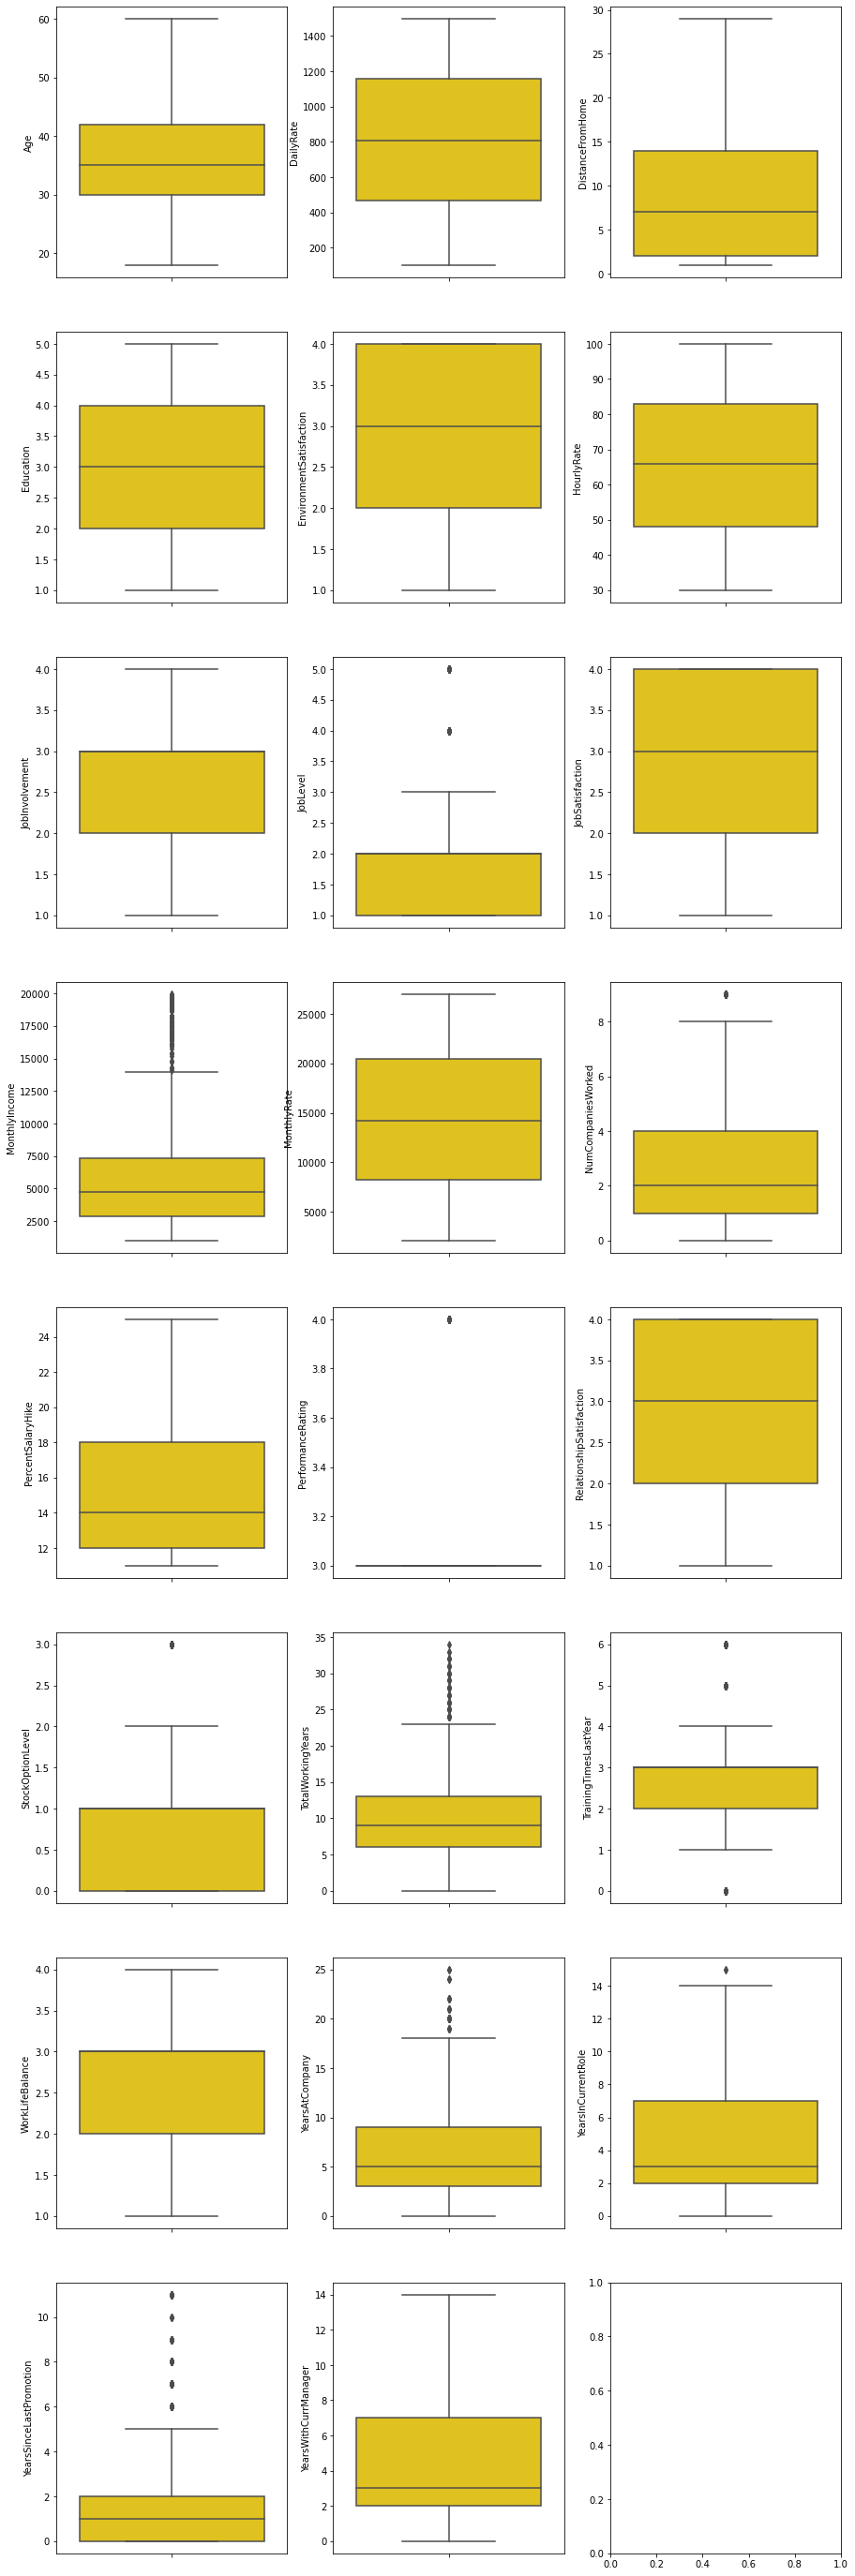

In [43]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="prism")
    index += 1
plt.show()

In [44]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

USING log transform to fix skewness

In [45]:
for col in integer_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

i applied log transform to remove skewness of our dataset.

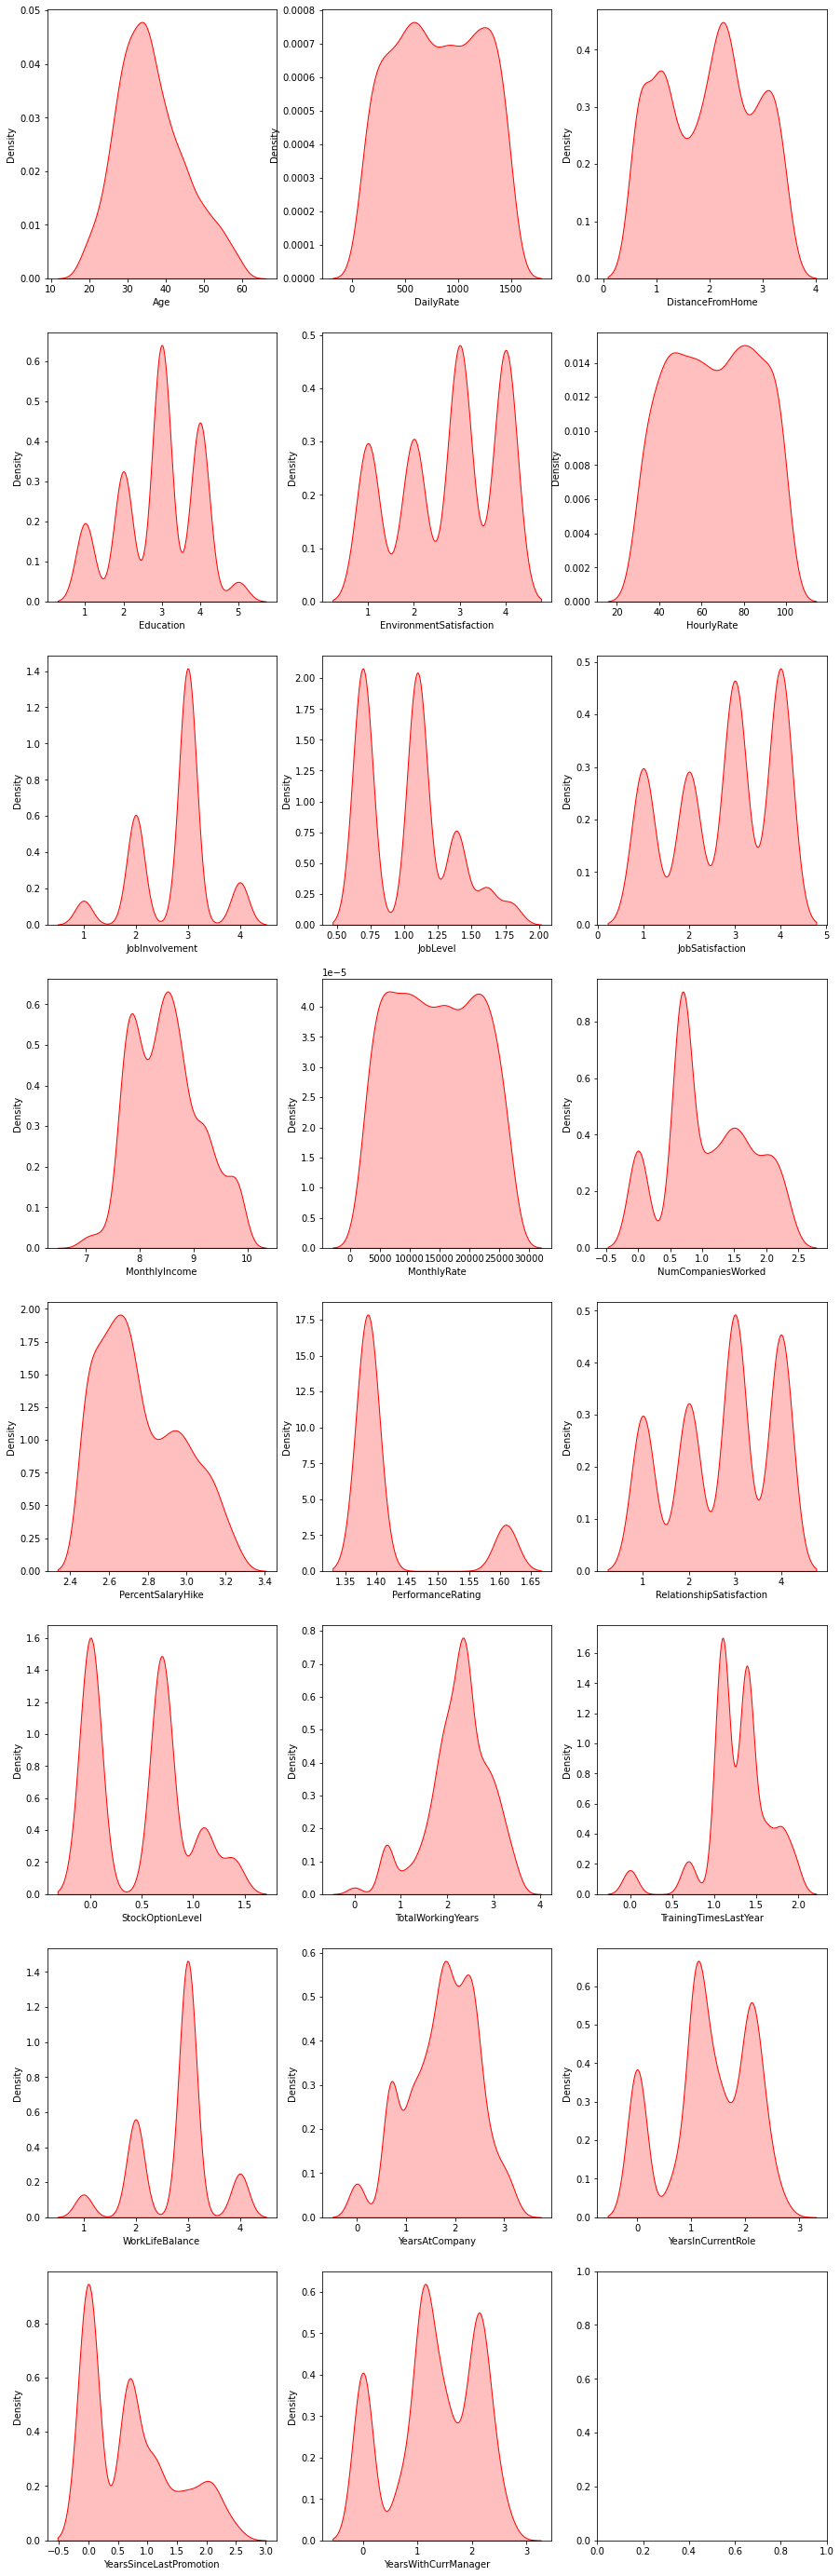

In [46]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade":True})
    index += 1
plt.show() 

we have manged to remove the skewness from our numerical columns.

Splitting the dataset into 2 variables

In [47]:
X = df.drop('Attrition', axis=1)
Y = df['Attrition']

X represent the feature column and Y represent the target column.

In [48]:
Y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category.

In [49]:
oversample = SMOTE()
X,Y = oversample.fit_resample(X,Y)

In [50]:
Y.value_counts()

0    1158
1    1158
Name: Attrition, dtype: int64

Feature scaling

In [51]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.715934,0.675991,0.828752,1.397531,-1.708716,-0.759181,-1.013484,-0.444114,-1.363709,1.501268,0.645439,0.417097,0.980140,1.414032,1.136824,0.531552,0.738671,1.748587,1.341398,-1.368133,-0.465878,-1.422948,-0.949791,0.141754,-3.426713,-2.154326,0.479375,0.546785,-1.003381,0.809115
1,1.658977,-0.995827,-1.281698,-0.598520,0.174673,-1.790420,-1.013484,0.485875,0.845966,-0.256590,-0.706131,0.417097,0.552648,-0.447234,-0.308744,0.266948,1.500020,-0.674405,-0.867753,2.082436,2.495396,1.415594,0.634775,0.442193,0.365321,0.538291,1.141513,1.182375,-0.006915,1.186292
2,0.244413,0.675991,1.523687,-0.598520,-1.200997,-0.759181,1.356572,1.415863,0.845966,1.394731,-0.706131,-0.978074,-1.157319,0.483399,1.136824,-1.260943,-1.657450,1.343732,1.341398,0.063982,-0.465878,-0.476767,-0.949791,-0.034587,0.365321,0.538291,-2.371294,-1.629675,-1.003381,-1.540041
3,-0.227108,-0.995827,1.572410,-0.598520,-0.840765,1.303298,-1.013484,1.415863,-1.363709,-0.522932,0.645439,-0.978074,0.552648,0.483399,-0.308744,-0.698386,1.254840,-0.674405,1.341398,-1.368133,-0.465878,0.469413,-0.949791,0.141754,0.365321,0.538291,0.847539,1.182375,0.989551,-1.540041
4,-0.934390,0.675991,-0.481625,-0.598520,-1.200997,-1.790420,0.566553,-1.374102,0.845966,-1.375227,0.645439,-0.978074,-1.157319,-0.447234,-0.308744,-0.399306,0.339341,1.918318,-0.867753,-0.969671,-0.465878,1.415594,0.634775,-0.234507,0.365321,0.538291,-0.761877,-0.144010,0.575980,-0.099663


I am scaling my feature data to ensure that tere is no issue with the data biasness over a particular period.

Finding best random state for building classification models

In [52]:
maxAccu=0
maxRS=0

for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=i)
    lr = LogisticRegression()
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test,pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i
        
print("Best accuracy score is",maxAccu,"on Random State",maxRS)

Best accuracy score is 88.60103626943005 on Random State 895


CREATING TRAINING AND TESTING DATASET

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=895)

MACHINE LEARNING MODEL FOR CLAASSIFICATION WITH EVALUTION MATRICS

In [54]:
def classify(model,X,Y):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=692)
    
    model.fit(X_train,Y_train)
    
    pred = model.predict(X_test)
    
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n",class_report)
    
    acc_score = (accuracy_score(Y_test,pred))*100
    print("Accuracy Score:",acc_score)
    
    cv_score = (cross_val_score(model,X,Y,cv=5).mean())*100
    print("Cross Validation Score:",cv_score)
    
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is",result)

I have defined the class with the help of train test split ,training of machine learning model.

In [55]:
#Logistic Regression

model=LogisticRegression()
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       288
           1       0.85      0.86      0.85       291

    accuracy                           0.85       579
   macro avg       0.85      0.85      0.85       579
weighted avg       0.85      0.85      0.85       579

Accuracy Score: 85.146804835924
Cross Validation Score: 84.02770536977731

Accuracy Score - Cross Validation Score is 1.119099466146693


In [56]:
#support vector classifier

model=SVC(C=1.0,kernel='rbf',gamma='auto',random_state=42)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       288
           1       0.90      0.91      0.90       291

    accuracy                           0.90       579
   macro avg       0.90      0.90      0.90       579
weighted avg       0.90      0.90      0.90       579

Accuracy Score: 90.32815198618307
Cross Validation Score: 90.76618008490357

Accuracy Score - Cross Validation Score is -0.4380280987204941


In [57]:
#DecisionTreeClassifier


model=DecisionTreeClassifier(random_state=21,max_depth=15)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       288
           1       0.82      0.80      0.81       291

    accuracy                           0.81       579
   macro avg       0.81      0.81      0.81       579
weighted avg       0.81      0.81      0.81       579

Accuracy Score: 81.34715025906736
Cross Validation Score: 83.5585015267744

Accuracy Score - Cross Validation Score is -2.2113512677070446


In [58]:
#RandomForestClassifier


model=RandomForestClassifier(max_depth=15,random_state=111)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       288
           1       0.97      0.87      0.92       291

    accuracy                           0.92       579
   macro avg       0.92      0.92      0.92       579
weighted avg       0.92      0.92      0.92       579

Accuracy Score: 91.8825561312608
Cross Validation Score: 90.8585313174946

Accuracy Score - Cross Validation Score is 1.0240248137662036


In [59]:
#KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.55      0.69       288
           1       0.68      0.96      0.80       291

    accuracy                           0.76       579
   macro avg       0.81      0.76      0.75       579
weighted avg       0.81      0.76      0.75       579

Accuracy Score: 75.64766839378238
Cross Validation Score: 77.76476502569449

Accuracy Score - Cross Validation Score is -2.117096631912105


In [60]:
#ExtraTreesClassifier
model=ExtraTreesClassifier()
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       288
           1       0.96      0.91      0.93       291

    accuracy                           0.94       579
   macro avg       0.94      0.94      0.94       579
weighted avg       0.94      0.94      0.94       579

Accuracy Score: 93.60967184801382
Cross Validation Score: 94.17637968272882

Accuracy Score - Cross Validation Score is -0.5667078347150039


In [61]:
#XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       288
           1       0.96      0.87      0.91       291

    accuracy                           0.92       579
   macro avg       0.92      0.92      0.92       579
weighted avg       0.92      0.92      0.92       579

Accuracy Score: 91.53713298791018
Cross Validation Score: 88.4006107097639

Accuracy Score - Cross Validation Score is 3.1365222781462876


HYPER PARAMETER TUNING ON THE BEST CLASSIFICATION ML MODEL

In [62]:
fmod_param = {'criterion' : ["gini", "entropy"],
             'splitter':["best","random"],
             'min_samples_split':[2,3,4],
             'max_depth':[4,6,8],
             'random_state':[42,111,895] 
             }

In [65]:
GSCV = GridSearchCV(DecisionTreeClassifier(),fmod_param,cv=5)

In [66]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8], 'min_samples_split': [2, 3, 4],
                         'random_state': [42, 111, 895],
                         'splitter': ['best', 'random']})

I have trained the grid search cv with the list of parameters i feel it should come best possible outcomes

In [67]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_split': 4,
 'random_state': 42,
 'splitter': 'best'}

here provides the best parameters

In [69]:
GSCV.best_score_

0.8578008546159198

In [74]:
Final_Model = DecisionTreeClassifier(criterion="entropy",max_depth=8,min_samples_split=4,
                                   random_state=42,splitter="best")
Classifier = Final_Model.fit(X_train,Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test,fmod_pred))*100
print("Accuracy score for the Best Model is:",fmod_acc)

Accuracy score for the Best Model is: 86.52849740932642


I have sucessfully incorporated the hyper parameter turning on my final model and received the accuracy score for it.

AOC ROC Curve

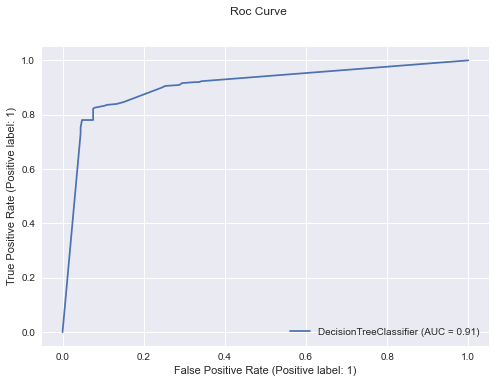

In [75]:
plt.style.use('seaborn')
disp=metrics.plot_roc_curve(Final_Model,X_test,Y_test)
disp.figure_.suptitle("Roc Curve")
plt.show()

I have generated the roc curve for my final model and its shows the auc score for my model to be 91%.

CONFUSION MATRIX

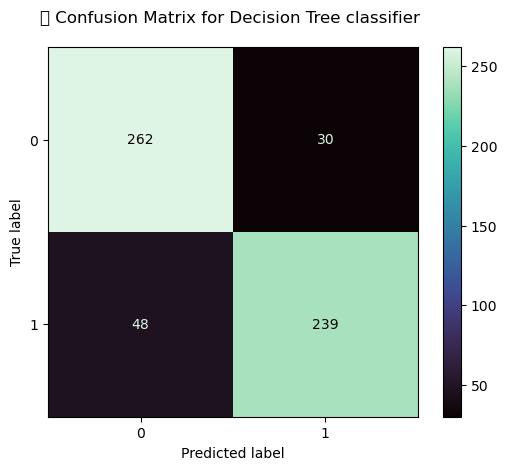

In [76]:
plt.style.use('default')
class_names = df.columns
metrics.plot_confusion_matrix(Classifier,X_test,Y_test,cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree classifier \n')
plt.show()

With the help of confusion matrix i am able to understand the numbers of times i got the correct outputs .

Saving the model

In [77]:
filename = "FinalModel_E11.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_E11.pkl']

Finally i saving my best classification model by using joblib